In [1]:
"""
2.5.1. Principal component analysis (PCA)
参考
http://scikit-learn.org/stable/modules/decomposition.html
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
"""
import numpy as np
from sklearn.decomposition import PCA

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [3]:
print(X.shape)
print(pca.explained_variance_ratio_)
print(pca.singular_values_) 

(6, 2)
[ 0.99244289  0.00755711]
[ 6.30061232  0.54980396]


In [4]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [5]:
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[ 0.99244289  0.00755711]
[ 6.30061232  0.54980396]


In [6]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

In [7]:
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[ 0.99244289]
[ 6.30061232]


In [8]:
"""
参考
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
"""
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [10]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [11]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

explained variance ratio (first two components): [ 0.92461621  0.05301557]


In [12]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()

In [13]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

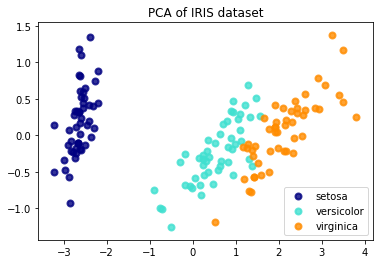

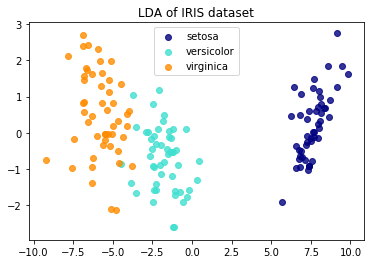

In [14]:
plt.show()